## import the libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

## categorise the popularity of the titles (target variables)

In [3]:
def get_pop(x):
    if x<34:
        return 0
    elif x>=34 and x<=66:
        return 1
    else:
        return 2

In [4]:
df=pd.read_csv('/home/primakov/Public/6th/Social Media and Data Driven /project/dataset/tracks.csv')

In [5]:
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [6]:
df0=df.copy()

## Preprocessing the dataset

In [7]:
df0['duration_m']=df0.apply(lambda x: x.duration_ms/(1000*60), axis=1)
df0['release_date'] = pd.to_datetime(df0['release_date'])
df0['year'] = df0['release_date'].dt.year
df0['month'] = df0['release_date'].dt.month

In [8]:
df0.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_m,year,month
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,0.4510,0.674,0.7440,0.151,0.127,104.851,3,2.115050,1922,2
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,0.9570,0.797,0.0000,0.148,0.655,102.009,1,1.636667,1922,6
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,0.0512,0.994,0.0218,0.212,0.457,130.418,5,3.027333,1922,3
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,0.0504,0.995,0.9180,0.104,0.397,169.980,3,2.948450,1922,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922-01-01,0.402,0.1580,...,0.0390,0.989,0.1300,0.311,0.196,103.220,4,2.718000,1922,1


In [9]:
df0.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'duration_m', 'year',
       'month'],
      dtype='object')

In [10]:
col=['explicit','danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'duration_m', 'year',
       'month','p_grp']

In [11]:
df0['p_grp']=df0['popularity'].apply(lambda x: get_pop(x))

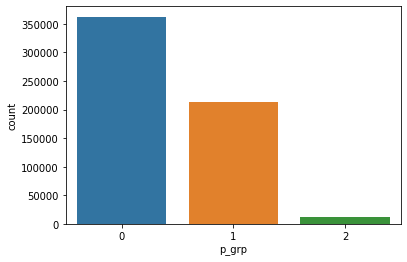

In [12]:
sns.countplot(df0['p_grp'])

In [13]:
le=LabelEncoder()
df0['year']=le.fit_transform(df0['year'])

In [14]:
x_col=['explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'duration_m', 'year', 'month']

In [15]:
X=df0[col].drop('p_grp', axis=1).values
y=df0['p_grp'].values

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=4)

## Training the model

In [16]:
model=LGBMClassifier(boosting_type='gbdt', n_estimators=376, max_depth=10, learning_rate=0.04, objective='multi_class', metric='multi_logloss',
                        is_unbalance=True,colsample_bytree=0.5, reg_lambda=2, reg_alpha=2, random_state=42, n_jobs=-1)

In [17]:
model.fit(X_train,y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


LGBMClassifier(colsample_bytree=0.5, is_unbalance=True, learning_rate=0.04,
               max_depth=10, metric='multi_logloss', n_estimators=376,
               objective='multi_class', random_state=42, reg_alpha=2,
               reg_lambda=2)

## Visualization of the result

In [18]:
y_pred=model.predict(X_test)

In [19]:
accuracy_score(y_test,y_pred)

0.750149998636376

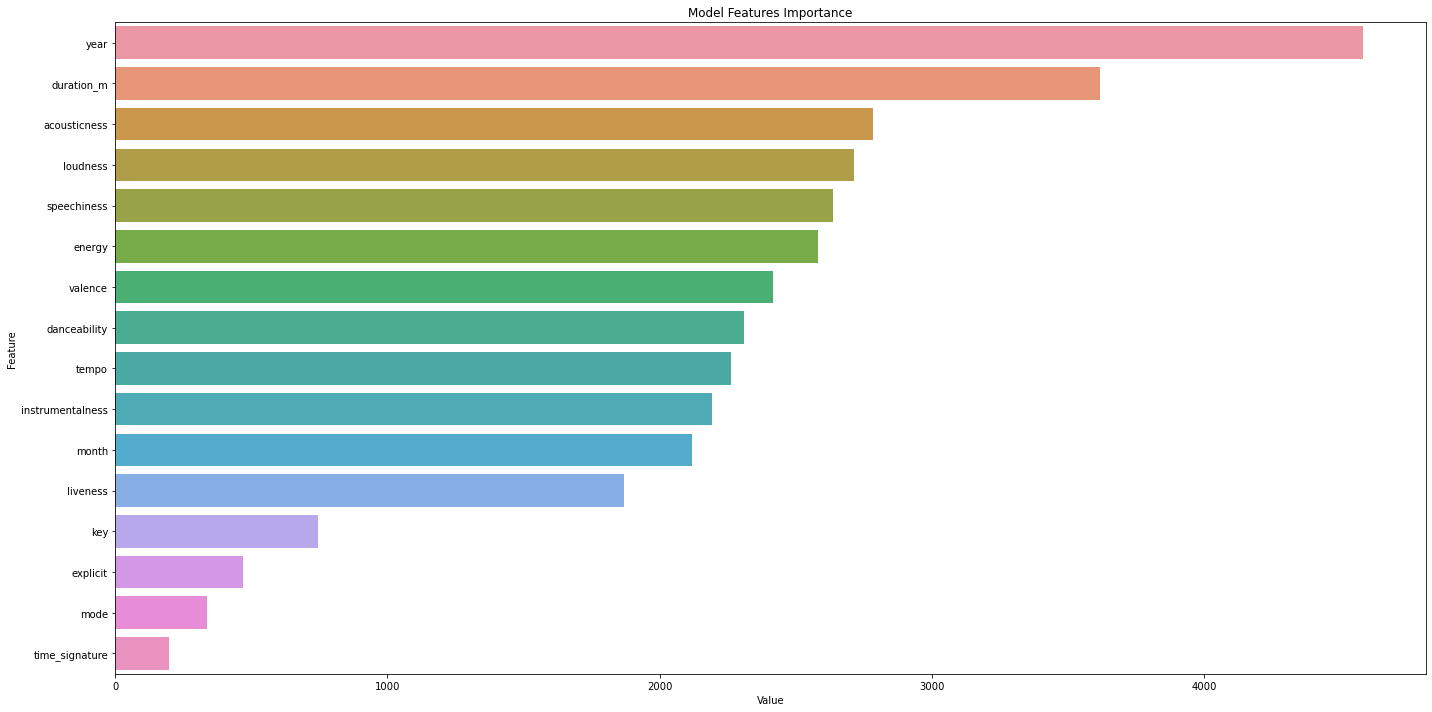

In [20]:
feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_,x_col)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Model Features Importance')
plt.tight_layout()

In [21]:
corr_matrix=df0[col].corr()

<AxesSubplot:>

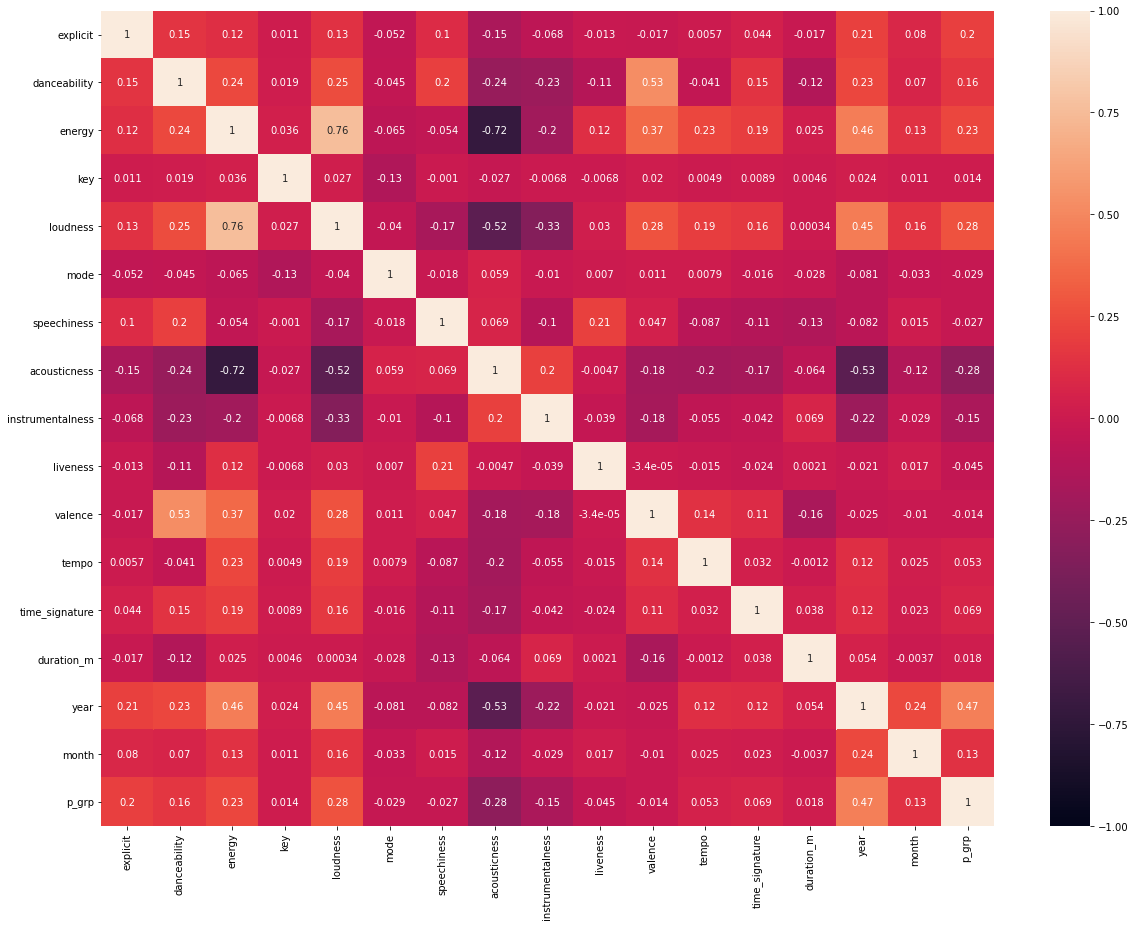

In [22]:
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)